In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from functools import reduce
from datetime import datetime, timedelta
from pycaret.classification import *

In [2]:
train_b = pd.read_excel('Train/train_bureau.xlsx')

In [3]:
train_d = pd.read_excel('Train/train_Data.xlsx')

In [4]:
train_b.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,2018-02-27,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,2019-12-19,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,NaT,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,NaT,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,NaT,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


In [5]:
test_d = pd.read_excel('Test/test_Data.xlsx')

In [6]:
test_b = pd.read_excel('Test/test_bureau.xlsx')

In [8]:
test_b.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,4,False,PRIMARY,Credit Card,CCC,2019-11-17,Individual,Active,2019-09-26,NaN,NaT,"10,000",588,NaN,589,NaN,0,0.0,NaN,"20191117,",000,"589,","0,","0,",NaN
1,4,False,PRIMARY,Housing Loan,HFC,2019-10-31,Joint,Active,2017-06-21,NaN,2019-10-15,NaN,"25,00,000","30,797/Monthly","21,07,227",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"2107227,2122196,2136877,2151448,2165910,218026...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
2,4,False,PRIMARY,Property Loan,HFC,2019-10-31,Joint,Active,2017-06-27,NaN,2019-10-15,NaN,"99,000","1,223/Monthly","83,458",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"83458,84051,84632,85209,85781,86349,86913,8747...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
3,4,True,PRIMARY,Tractor Loan,NBF,2015-10-31,Individual,Closed,2011-12-29,2015-10-13 00:00:00,NaT,NaN,"3,65,000",NaN,0,NaN,0,0.0,NaN,"20151031,20150901,20150831,20150731,20150630,2...",000DDD0270000000000000000000000000000000000000...,"0,,21548,32097,42500,52758,62874,72850,82688,9...","0,,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,5,False,PRIMARY,Gold Loan,PRB,2017-08-31,Individual,Closed,2016-05-04,2017-06-15 00:00:00,2017-06-15,NaN,"25,801",NaN,0,NaN,0,0.0,NaN,"20170630,20170501,20170401,20170331,20170201,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,25846,,,25846,,,25846,,,25846,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN


In [172]:
train_bb = train_b.copy()

In [173]:
test_bb = test_b.copy()

In [174]:
# Data Treatment:
#     -categorical vars

In [175]:
# id -dont do it
# self indiactor -nochange
# match type- not req
# acct type -required 3 columns chosen for remaning crosstab then combine cols
    
 #contributor type ARC is not ptesent in test so crosstab and then delete arc   
# ownership indicator no rpoblem
# account status not present in test Sold/Purchased ,Cancelled cross tab then delete                            
# credit limit CREDIT-LIMIT/SANC AMT  DISBURSED-AMT/HIGH CREDIT kbindiscretization
# installment not present in test data F04 F07  F08 crosstab then delete it
# asset class 2 not ptresent in test crosstab and remove it

In [176]:
train_b.ID

0              1
1              1
2              1
3              1
4              1
           ...  
560839    143393
560840    143393
560841    143393
560842    143394
560843    143395
Name: ID, Length: 560844, dtype: int64

In [177]:
train_SELF_INDICATOR=pd.crosstab(train_b.ID,train_b['SELF-INDICATOR'],dropna= True).reset_index()
test_SELF_INDICATOR=pd.crosstab(test_b.ID,test_b['SELF-INDICATOR'],dropna= True).reset_index()

In [178]:
train_MATCH_TYPE=pd.crosstab(train_b.ID,train_b['MATCH-TYPE'],dropna= True).reset_index()
test_MATCH_TYPE=pd.crosstab(test_b.ID,test_b['MATCH-TYPE'],dropna= True).reset_index()

In [179]:
x = set(train_bb['ACCT-TYPE'].unique())  
y = set(test_bb['ACCT-TYPE'].unique()) 
common = x.intersection(y)
print(list(common)) #now decide cols to keep 

['Property Loan', 'Tractor Loan', 'Business Loan Against Bank Deposits', 'JLG Individual', 'Business Loan Priority Sector  Small Business', 'Business Loan Unsecured', 'SHG Individual', 'Construction Equipment Loan', 'Pradhan Mantri Awas Yojana - CLSS', 'Fleet Card', 'Business Loan - Secured', 'Credit Card', 'Microfinance Others', 'Used Car Loan', 'Mudra Loans   Shishu / Kishor / Tarun', 'Two-Wheeler Loan', 'Business Loan Priority Sector  Others', 'Business Loan General', 'Housing Loan', 'Consumer Loan', 'Corporate Credit Card', 'Overdraft', 'Business Non-Funded Credit Facility-Priority Sector- Small Business', 'Loan Against Bank Deposits', 'Microfinance Business Loan', 'Business Non-Funded Credit Facility-Priority Sector-Agriculture', 'Commercial Equipment Loan', 'Commercial Vehicle Loan', 'Non-Funded Credit Facility', 'Microfinance Housing Loan', 'Gold Loan', 'Loan Against Shares / Securities', 'Secured Credit Card', 'Business Loan Priority Sector  Agriculture', 'Prime Minister Jaan D

In [180]:
train_ACCT_TYPE=pd.crosstab(train_b.ID,train_b['ACCT-TYPE'],dropna= True).reset_index()
test_ACCT_TYPE=pd.crosstab(test_b.ID,test_b['ACCT-TYPE'],dropna= True).reset_index()

cols_to_keep =['Tractor Loan','Gold Loan','Business Loan Priority Sector  Agriculture']

train_ACCT_TYPE["Others"] = pd.DataFrame(train_ACCT_TYPE.drop(columns=cols_to_keep).sum(axis=1))
test_ACCT_TYPE["Others"] = pd.DataFrame(test_ACCT_TYPE.drop(columns=cols_to_keep).sum(axis=1))
filter_cols =cols_to_keep + ['Others','ID'] 
train_ACCT_TYPE = train_ACCT_TYPE.filter(filter_cols)
test_ACCT_TYPE = test_ACCT_TYPE.filter(filter_cols)

In [181]:
train_CONTRIBUTOR_TYPE=pd.crosstab(train_b.ID,train_b['CONTRIBUTOR-TYPE'],dropna= True).drop(columns = ['ARC']).reset_index()
test_CONTRIBUTOR_TYPE=pd.crosstab(test_b.ID,test_b['CONTRIBUTOR-TYPE'],dropna= True).reset_index()


In [182]:
train_OWNERSHIP_IND=pd.crosstab(train_b.ID,train_b['OWNERSHIP-IND'],dropna= True).reset_index()
test_OWNERSHIP_IND=pd.crosstab(test_b.ID,test_b['OWNERSHIP-IND'],dropna= True).reset_index()


In [183]:
train_ACCOUNT_STATUS=pd.crosstab(train_b.ID,train_b['ACCOUNT-STATUS'],dropna= True).drop(columns=['Sold/Purchased','Cancelled']).reset_index()
test_ACCOUNT_STATUS=pd.crosstab(test_b.ID,test_b['ACCOUNT-STATUS'],dropna= True).reset_index()


In [184]:
train_INSTALLMENT_FREQUENCY=pd.crosstab(train_b.ID,train_b['INSTALLMENT-FREQUENCY'],dropna= True).drop(columns=['F04','F07','F08']).reset_index()
test_INSTALLMENT_FREQUENCY=pd.crosstab(test_b.ID,test_b['INSTALLMENT-FREQUENCY'],dropna= True).reset_index()

In [185]:
train_ASSET_CLASS=pd.crosstab(train_b.ID,train_b['ASSET_CLASS'],dropna= True).drop(columns=['2']).reset_index()
test_ASSET_CLASS=pd.crosstab(test_b.ID,test_b['ASSET_CLASS'],dropna= True).reset_index()

In [186]:
def onehotencoder(train,test,cols=[]):
    
    from sklearn.preprocessing import OneHotEncoder
    #object_cols = catVar1(train) #catVar1 gives desired categorical column and not all object columns
    object_cols=cols
    print(object_cols)
    
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[object_cols]))
    OH_cols_test = pd.DataFrame(OH_encoder.transform(test[object_cols]))

    # One-hot encoding removed index; put it back
    OH_cols_train.index = train.index
    OH_cols_test.index = test.index

    ##hack for restoring columns names just like get dummies
    column_name = OH_encoder.get_feature_names(object_cols)
    OH_cols_train.columns = column_name
    OH_cols_test.columns = column_name
    

    # Remove desired categorical columns (will replace with one-hot encoding)
    num_train = train.drop(object_cols, axis=1)
    num_test = test.drop(object_cols, axis=1)

    # Add one-hot encoded columns to numerical/remaining features
    OH_train = pd.concat([num_train, OH_cols_train], axis=1)
    OH_test = pd.concat([num_test, OH_cols_test], axis=1)
    

    
    print(OH_train.shape,OH_test.shape)
    
    
    return OH_train,OH_test

def targetencoding(train,test,y_train,drop=False,cols=[]):
    import category_encoders as ce
    # Create the encoder itself
    cat_features = cols
    print(f'targest emcoding for features {cat_features}')
    target_enc = ce.TargetEncoder(cols=cat_features)

    

    # Fit the encoder using the categorical features and target
    target_enc.fit(train[cat_features], y_train)
    

    # Transform the features, rename the columns with _target suffix, and join to dataframe
    traintrgtenc = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
    testtrgtenc = test.join(target_enc.transform(test[cat_features]).add_suffix('_target'))

    if drop :
        traintrgtenc = traintrgtenc.drop(cat_features, axis =1)
        testtrgtenc = testtrgtenc.drop(cat_features, axis =1)

    
    print(traintrgtenc.shape,testtrgtenc.shape)
    
    return traintrgtenc,testtrgtenc


def ordinalencoding(train,test,y_train,mapping,drop=False,cols=[]):
    import category_encoders as ce
    # Create the encoder itself
    cat_features = cols
    print(f'ordinal encoding for features {cat_features}')
    target_enc = ce.OrdinalEncoder(cols=cat_features,mapping = mapping)

    

    # Fit the encoder using the categorical features and target
    target_enc.fit(train[cat_features], y_train)
    

    # Transform the features, rename the columns with _target suffix, and join to dataframe
    traintrgtenc = train.join(target_enc.transform(train[cat_features]).add_suffix('_ordinal'))
    testtrgtenc = test.join(target_enc.transform(test[cat_features]).add_suffix('_ordinal'))

    if drop :
        traintrgtenc = traintrgtenc.drop(cat_features, axis =1)
        testtrgtenc = testtrgtenc.drop(cat_features, axis =1)

    
    print(traintrgtenc.shape,testtrgtenc.shape)
    
    return traintrgtenc,testtrgtenc

In [187]:
train_bb['DISBURSED-AMT/HIGH CREDIT'] = train_b['DISBURSED-AMT/HIGH CREDIT'].str.replace(',', '').astype('float')
test_bb['DISBURSED-AMT/HIGH CREDIT'] = test_b['DISBURSED-AMT/HIGH CREDIT'].str.replace(',', '').astype('float')

In [188]:
train_bb['CURRENT-BAL'] = train_b['CURRENT-BAL'].fillna(0)
test_bb['CURRENT-BAL'] = test_b['CURRENT-BAL'].fillna(0)
train_bb['CURRENT-BAL'] = train_b['CURRENT-BAL'].str.replace(',', '').astype('float')
test_bb['CURRENT-BAL'] = test_b['CURRENT-BAL'].str.replace(',', '').astype('float')

In [189]:

train_CURRENT = train_bb[['CURRENT-BAL','ID']].dropna()
test_CURRENT = test_bb[['CURRENT-BAL','ID']].dropna()

enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
enc.fit(train_bb['CURRENT-BAL'].dropna().values.reshape(-1,1))

train_CURRENT['CURRENT-BAL'] = enc.transform(train_CURRENT['CURRENT-BAL'].values.reshape(-1,1))
test_CURRENT['CURRENT-BAL']= enc.transform(test_CURRENT['CURRENT-BAL'].values.reshape(-1,1))

In [190]:
train_CURRENT=pd.crosstab(train_CURRENT.ID,train_CURRENT['CURRENT-BAL'],dropna= True).reset_index()
test_CURRENT=pd.crosstab(test_CURRENT.ID,test_CURRENT['CURRENT-BAL'],dropna= True).reset_index()
test_CURRENT['3.0']=0

In [191]:
# train_CURRENT

In [192]:

train_DISBURSED = train_bb[['DISBURSED-AMT/HIGH CREDIT','ID']].dropna()
test_DISBURSED = test_bb[['DISBURSED-AMT/HIGH CREDIT','ID']].dropna()

enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
enc.fit(train_bb['DISBURSED-AMT/HIGH CREDIT'].dropna().values.reshape(-1,1))

train_DISBURSED['DISBURSED-AMT/HIGH CREDIT'] = enc.transform(train_DISBURSED['DISBURSED-AMT/HIGH CREDIT'].values.reshape(-1,1))
test_DISBURSED['DISBURSED-AMT/HIGH CREDIT']= enc.transform(test_DISBURSED['DISBURSED-AMT/HIGH CREDIT'].values.reshape(-1,1))

In [193]:
train_DISBURSED=pd.crosstab(train_DISBURSED.ID,train_DISBURSED['DISBURSED-AMT/HIGH CREDIT'],dropna= True).reset_index()
test_DISBURSED=pd.crosstab(test_DISBURSED.ID,test_DISBURSED['DISBURSED-AMT/HIGH CREDIT'],dropna= True).reset_index()
test_DISBURSED['2.0']=0

In [194]:
# #discretisation baes on clusters

# train_tenure = train_bb[['TENURE','ID']].dropna()
# test_tenure = test_bb[['TENURE','ID']].dropna()

# enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
# enc.fit(train_bb['TENURE'].dropna().values.reshape(-1,1))

# train_tenure['TENURE'] = enc.transform(train_tenure['TENURE'].values.reshape(-1,1))
# test_tenure['TENURE']= enc.transform(test_tenure['TENURE'].values.reshape(-1,1))

In [195]:
# train_tenure=pd.crosstab(train_tenure.ID,train_tenure['TENURE'],dropna= True).reset_index()
# test_tenure=pd.crosstab(test_tenure.ID,test_tenure['TENURE'],dropna= True).reset_index()


In [196]:
# train_SELF_INDICATOR
# train_INSTALLMENT_FREQUENCY
# train_ACCOUNT_STATUS
# train_OWNERSHIP_IND
# train_CONTRIBUTOR_TYPE
# train_ACCT_TYPE

In [197]:
dataframes = [train_b.ID,train_SELF_INDICATOR,train_INSTALLMENT_FREQUENCY,train_ACCOUNT_STATUS,train_OWNERSHIP_IND,
              train_CONTRIBUTOR_TYPE,train_ACCT_TYPE,train_MATCH_TYPE,train_ASSET_CLASS,train_CURRENT,train_DISBURSED]
final_df_train_beauro = reduce(lambda left, right: pd.merge(left, right, on='ID', how='left'), dataframes)

final_df_train_beauro = final_df_train_beauro.fillna(0)

In [198]:
dataframes = [train_b.ID,train_SELF_INDICATOR,train_INSTALLMENT_FREQUENCY,train_ACCOUNT_STATUS,train_OWNERSHIP_IND,
              train_CONTRIBUTOR_TYPE,train_ACCT_TYPE,train_MATCH_TYPE,train_ASSET_CLASS,train_CURRENT,train_DISBURSED]
final_df_test_beauro = reduce(lambda left, right: pd.merge(left, right, on='ID', how='left'), dataframes)
final_df_test_beauro = final_df_test_beauro.fillna(0)

In [199]:
###### now train data 

In [200]:
train_dd = train_d.copy()
test_dd = test_d.copy()

In [201]:
train_dd.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [202]:
train_dd['SEX'] = train_dd['SEX'].fillna(train_dd['SEX'].mode()[0])
test_dd['SEX'] = test_dd['SEX'].fillna(test_dd['SEX'].mode()[0])

train_dd['AGE'] = train_dd['AGE'].fillna(train_dd['AGE'].mode()[0])
test_dd['AGE'] = test_dd['AGE'].fillna(test_dd['AGE'].mode()[0])

train_dd['MonthlyIncome'] = train_dd['MonthlyIncome'].fillna(train_dd['MonthlyIncome'].mode()[0])
test_dd['MonthlyIncome'] = test_dd['MonthlyIncome'].fillna(test_dd['MonthlyIncome'].mode()[0])

train_dd['ZiPCODE']  =train_dd['ZiPCODE'].fillna(method = 'ffill').astype('int') 
test_dd['ZiPCODE']  =test_dd['ZiPCODE'].fillna(method = 'ffill').astype('int') 


train_dd =train_dd.fillna(method ='ffill') 
test_dd =test_dd.fillna(method = 'ffill') 

In [203]:
train_dd['AuthDate'] = pd.to_datetime(train_d['AuthDate'] ,errors='coerce')
test_dd['AuthDate'] = pd.to_datetime(test_d['AuthDate'] ,errors='coerce')

train_dd['DisbursalDate'] = pd.to_datetime(train_d['DisbursalDate'] ,errors='coerce')
test_dd['DisbursalDate'] = pd.to_datetime(test_d['DisbursalDate'] ,errors='coerce')

train_dd['MaturityDAte'] = pd.to_datetime(train_d['MaturityDAte'] ,errors='coerce')
test_dd['MaturityDAte'] = pd.to_datetime(test_d['MaturityDAte'] ,errors='coerce')

train_dd = train_d.dropna()
#test_dd['MaturityDAte'] = test_d['MaturityDAte'].fillna(method='ffill')

In [204]:
# train_dd['AuthtoMatureDays'] = (train_dd['AuthDate'] - train_dd['MaturityDAte']).astype('int')
# test_dd['AuthtoMatureDays'] = (test_dd['AuthDate'] - test_dd['MaturityDAte']).astype('int')

# train_dd['AuthtoDisDays'] = (train_dd['AuthDate'] - train_dd['DisbursalDate']).astype('int')
# test_dd['AuthtoDisDays'] = (test_dd['AuthDate'] - test_dd['DisbursalDate']).astype('int')

In [205]:
train_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107126 entries, 1 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               107126 non-null  int64         
 1   Frequency        107126 non-null  object        
 2   InstlmentMode    107126 non-null  object        
 3   LoanStatus       107126 non-null  object        
 4   PaymentMode      107126 non-null  object        
 5   BranchID         107126 non-null  int64         
 6   Area             107126 non-null  object        
 7   Tenure           107126 non-null  int64         
 8   AssetCost        107126 non-null  int64         
 9   AmountFinance    107126 non-null  float64       
 10  DisbursalAmount  107126 non-null  float64       
 11  EMI              107126 non-null  float64       
 12  DisbursalDate    107126 non-null  datetime64[ns]
 13  MaturityDAte     107126 non-null  datetime64[ns]
 14  AuthDate         107

In [206]:
train_dd['AuthYear'] = train_dd['AuthDate'].dt.year
test_dd['AuthYear'] = test_dd['AuthDate'].dt.year 

train_dd['AuthMonth'] = train_dd['AuthDate'].dt.month 
test_dd['AuthMonth'] = test_dd['AuthDate'].dt.month  


train_dd['MaturityYear'] = train_d['MaturityDAte'].dt.year  
test_dd['MaturityYear'] = test_d['MaturityDAte'].dt.year  

train_dd['MaturityMonth'] = train_d['MaturityDAte'].dt.month  
test_dd['MaturityMonth'] = test_d['MaturityDAte'].dt.month  

In [223]:
train_dd.isna().sum()
test_dd.isna().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
AmountFinance      0
DisbursalAmount    0
EMI                0
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
AuthYear           0
AuthMonth          0
MaturityYear       0
MaturityMonth      0
dtype: int64

In [209]:
train_dd = train_dd.drop(columns=['City','Area','AuthDate','DisbursalDate','MaturityDAte'])
test_dd = test_dd.drop(columns=['City','Area','AuthDate','DisbursalDate','MaturityDAte'])

In [210]:
mapping_dict = {'No Top-up Service':0, '12-18 Months':1,'18-24 Months':2, '24-30 Months':3, 
                '30-36 Months':4,'36-48 Months':5,' > 48 Months':6}

In [211]:
train_dd['Top-up Month'] = train_dd['Top-up Month'].replace(mapping_dict) 

In [212]:
mapping_dict_f= [
{'col': 'Frequency', 'mapping': {'BI-Monthly':0, 'Monthly': 1, 'Quatrly': 2,  'Half Yearly': 3}}
]

In [213]:
f1,f2 = ordinalencoding(train_dd,test_dd,train_dd['Top-up Month'],drop =True,cols=['Frequency'],mapping= mapping_dict_f)

ordinal encoding for features ['Frequency']
(107126, 25) (14745, 24)


In [214]:
f11,f22 = onehotencoder(f1,f2,cols=['InstlmentMode','LoanStatus','SEX'])

['InstlmentMode', 'LoanStatus', 'SEX']
(107126, 28) (14745, 27)


In [215]:
f111,f222 = targetencoding(f11,f22,f11['Top-up Month'],drop=True,cols=['PaymentMode','State','BranchID','ZiPCODE','ManufacturerID']) #because branch id and area same

targest emcoding for features ['PaymentMode', 'State', 'BranchID', 'ZiPCODE', 'ManufacturerID']
(107126, 28) (14745, 27)


In [216]:

final_df_train_beauro.rename(columns={0.0: '0.0', 1.0: '1.0'}, inplace=True)

final_df_test_beauro.rename(columns={0.0: '0.0', 1.0: '1.0'}, inplace=True)

In [217]:
set(final_df_test_beauro.columns) - set(final_df_train_beauro.columns) 

set()

In [218]:
dataframes = [f111,final_df_train_beauro]
final_df_train = reduce(lambda left, right: pd.merge(left, right, on='ID', how='left'), dataframes)

In [219]:
dataframes = [f222,final_df_test_beauro]
final_df_test = reduce(lambda left, right: pd.merge(left, right, on='ID', how='left'), dataframes)

In [224]:
final_df_train = final_df_train.fillna(0)  #only count clusters values will be null here no problem in fillin with 0
final_df_test = final_df_test.fillna(0)

final_df_test.isna().sum()

ID                 0
Tenure             0
AssetCost          0
AmountFinance      0
DisbursalAmount    0
                  ..
3.0_x              0
0.0                0
1.0                0
2.0_y              0
3.0_y              0
Length: 81, dtype: int64

In [225]:
# final_df_train = final_df_train.fillna(0)
# final_df_test = final_df_test.fillna(0)

In [133]:
final_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471743 entries, 0 to 471742
Data columns (total 82 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          471743 non-null  int64  
 1   Tenure                                      471743 non-null  int64  
 2   AssetCost                                   471743 non-null  int64  
 3   AmountFinance                               471743 non-null  float64
 4   DisbursalAmount                             471743 non-null  float64
 5   EMI                                         471743 non-null  float64
 6   AssetID                                     471743 non-null  int64  
 7   SupplierID                                  471743 non-null  int64  
 8   LTV                                         471743 non-null  float64
 9   AGE                                         471743 non-null  float64
 

In [269]:
final_df_train.to_csv('train.csv',index =False)
final_df_test.to_csv('test.csv',index =False)

In [134]:
final_df_train.columns

Index(['ID', 'Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount', 'EMI',
       'AssetID', 'SupplierID', 'LTV', 'AGE', 'MonthlyIncome', 'Top-up Month',
       'AuthYear', 'AuthMonth', 'MaturityYear', 'MaturityMonth',
       'Frequency_ordinal', 'InstlmentMode_Advance', 'InstlmentMode_Arrear',
       'LoanStatus_Active', 'LoanStatus_Closed', 'SEX_F', 'SEX_M',
       'PaymentMode_target', 'State_target', 'BranchID_target',
       'ZiPCODE_target', 'ManufacturerID_target', 'False_x', 'True_x', 'F01',
       'F02', 'F03', 'F05', 'F06', 'F10', 'Active', 'Closed', 'Delinquent',
       'Restructured', 'SUIT FILED (WILFUL DEFAULT)', 'Settled', 'Suit Filed',
       'WILFUL DEFAULT', 'Written Off', 'Guarantor', 'Individual', 'Joint',
       'Primary', 'Supl Card Holder', 'CCC', 'COP', 'FRB', 'HFC', 'MFI', 'NAB',
       'NBF', 'OFI', 'PRB', 'RRB', 'SFB', 'Tractor Loan', 'Gold Loan',
       'Business Loan Priority Sector  Agriculture', 'Others', 'PRIMARY',
       'SECONDARY', '01', '1', 'Dou

In [68]:
final_df_train['Top-up Month'].value_counts()

0    320802
6     62978
5     23968
3     21152
4     17931
2     16338
1      8574
Name: Top-up Month, dtype: int64

In [ ]:
[ 'AssetID', 'SupplierID',
       'AuthYear', 'AuthMonth', 'MaturityYear', 'MaturityMonth',
       'Frequency_ordinal', 'InstlmentMode_Advance', 'InstlmentMode_Arrear',
       'LoanStatus_Active', 'LoanStatus_Closed', 'SEX_F', 'SEX_M',
       'PaymentMode_target', 'State_target', 'BranchID_target',
       'ZiPCODE_target', 'ManufacturerID_target', 'False_x', 'True_x', 'F01',
       'F02', 'F03', 'F05', 'F06', 'F10', 'Active', 'Closed', 'Delinquent',
       'Restructured', 'SUIT FILED (WILFUL DEFAULT)', 'Settled', 'Suit Filed',
       'WILFUL DEFAULT', 'Written Off', 'Guarantor', 'Individual', 'Joint',
       'Primary', 'Supl Card Holder', 'CCC', 'COP', 'FRB', 'HFC', 'MFI', 'NAB',
       'NBF', 'OFI', 'PRB', 'RRB', 'SFB', 'Tractor Loan', 'Gold Loan',
       'Business Loan Priority Sector  Agriculture', 'Others', 'PRIMARY',
       'SECONDARY', '01', '1', 'Doubtful', 'Loss', 'Special Mention Account',
       'Standard', 'SubStandard', '0.0_y', '1.0_y', '2.0_x', '3.0_x', '0.0',
       '1.0', '2.0_y', '3.0_y']

In [70]:
pycaret = setup(data =final_df_train , target ='Top-up Month',session_id=456 )

,Description,Value
0,session_id,456
1,Target,Top-up Month
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6"
4,Original Data,"(471743, 82)"
5,Missing Values,False
6,Numeric Features,51
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# compare_models(blacklist = ['svm'], sort = 'F1')   

In [71]:
rf = create_model(estimator = 'rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9896,0.9984,0.9718,0.9897,0.9895,0.9794,0.9795
1,0.9905,0.9986,0.9728,0.9906,0.9904,0.9813,0.9814
2,0.9890,0.9985,0.9690,0.9891,0.9889,0.9782,0.9784
3,0.9900,0.9985,0.9737,0.9901,0.9899,0.9802,0.9804
4,0.9903,0.9986,0.9732,0.9904,0.9903,0.9810,0.9811
5,0.9888,0.9983,0.9683,0.9889,0.9888,0.9779,0.9781
6,0.9894,0.9981,0.9702,0.9895,0.9893,0.9790,0.9792
7,0.9896,0.9985,0.9719,0.9897,0.9895,0.9794,0.9796
8,0.9896,0.9986,0.9714,0.9897,0.9896,0.9795,0.9797
9,0.9895,0.9987,0.9704,0.9896,0.9894,0.9793,0.9794


In [246]:
dt = create_model(estimator = 'dt')
#Mean	0.9819	0.9827	0.9717	0.9819	0.9819	0.9647	0.9647

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9820,0.9832,0.9734,0.9820,0.9820,0.9649,0.9649
1,0.9809,0.9822,0.9711,0.9810,0.9810,0.9629,0.9629
2,0.9814,0.9825,0.9694,0.9815,0.9815,0.9638,0.9638
3,0.9827,0.9832,0.9734,0.9827,0.9827,0.9663,0.9663
4,0.9829,0.9837,0.9728,0.9829,0.9829,0.9667,0.9667
5,0.9814,0.9824,0.9700,0.9815,0.9815,0.9638,0.9639
6,0.9813,0.9821,0.9700,0.9813,0.9813,0.9635,0.9635
7,0.9827,0.9824,0.9727,0.9827,0.9827,0.9663,0.9663
8,0.9819,0.9829,0.9725,0.9820,0.9819,0.9648,0.9648
9,0.9816,0.9824,0.9714,0.9816,0.9816,0.9641,0.9641


In [73]:
#lgb = create_model(estimator = 'lightgbm')
#0.8652	0.9496	0.6853	0.8655	0.8572	0.7084	0.7196

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8656,0.9507,0.6883,0.8656,0.8577,0.7097,0.7206
1,0.8617,0.9504,0.6711,0.8615,0.8534,0.7006,0.7119
2,0.8664,0.9498,0.6883,0.8670,0.8586,0.7112,0.7224
3,0.8640,0.9488,0.6885,0.8641,0.8562,0.7064,0.7172
4,0.8686,0.9513,0.6931,0.8696,0.8607,0.7155,0.7271
5,0.8658,0.9493,0.6907,0.8659,0.8580,0.7104,0.7212
6,0.8638,0.9478,0.6837,0.8644,0.8560,0.7057,0.7167
7,0.8642,0.9491,0.6813,0.8643,0.8558,0.7057,0.7174
8,0.8665,0.9497,0.6861,0.8670,0.8588,0.7116,0.7225
9,0.8649,0.9493,0.6820,0.8653,0.8567,0.7076,0.7191


In [ ]:
# lda = create_model(estimator = 'lda')

In [ ]:
# catboost = create_model(estimator = 'catboost')

In [ ]:
# tune_rf = tune_model(estimator = rf,  optimize = 'F1',verbose = True)

In [247]:
tune_dt = tune_model(estimator = dt,  optimize = 'F1',  verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7040,0.7072,0.2207,0.5749,0.6329,0.2874,0.3108
1,0.7045,0.7069,0.2216,0.5755,0.6334,0.2893,0.3127
2,0.7037,0.7048,0.2192,0.5741,0.6323,0.2841,0.3081
3,0.7027,0.7050,0.2208,0.5743,0.6319,0.2862,0.3089
4,0.7040,0.7047,0.2197,0.5743,0.6326,0.2848,0.3088
5,0.7033,0.7057,0.2208,0.5747,0.6325,0.2872,0.3102
6,0.7042,0.7097,0.2203,0.5748,0.6329,0.2868,0.3105
7,0.7076,0.7061,0.2221,0.5775,0.6360,0.2949,0.3194
8,0.7073,0.7072,0.2230,0.5775,0.6358,0.2950,0.3192
9,0.7062,0.7084,0.2211,0.5763,0.6346,0.2909,0.3152


In [ ]:
# tune_lda = tune_model(estimator = 'lda',  optimize = 'F1',  verbose = True)


In [ ]:
# tune_lgb = tune_model(estimator = 'lightgbm',  optimize = 'F1',  verbose = True)


In [ ]:
# tune_ridge = tune_model(estimator = 'ridge',  optimize = 'F1',  verbose = True)


In [ ]:
# tune_ridge = tune_model(estimator = 'catboost',  optimize = 'F1',  verbose = True)


In [164]:
# blend_models(estimator_list = 'All',  fold = 10,  round = 4,  choose_better = False, optimize = 'F1', method = 'hard',verbose = True)

In [165]:
# blend_specific_hard = blend_models(estimator_list = [tune_dt,tune_lgb], method = 'hard') 

In [ ]:
# blend_specific_soft = blend_models(estimator_list = [tune_dt,tune_lgb], method = 'soft') #those who support predict prob 

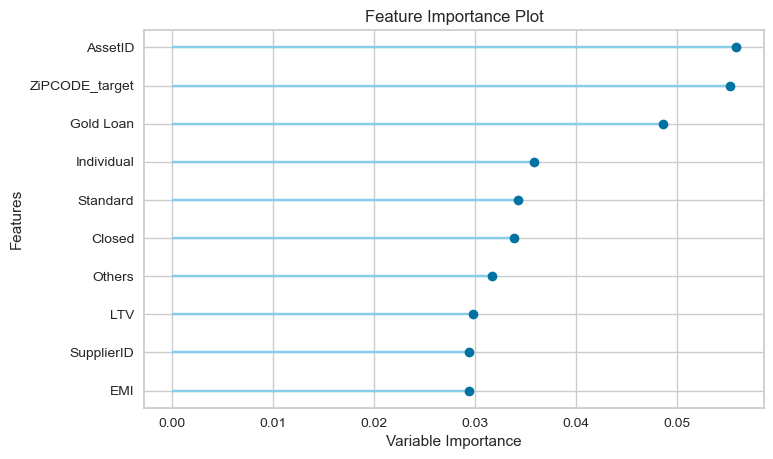

In [72]:
plot_model(estimator=rf, plot='feature')

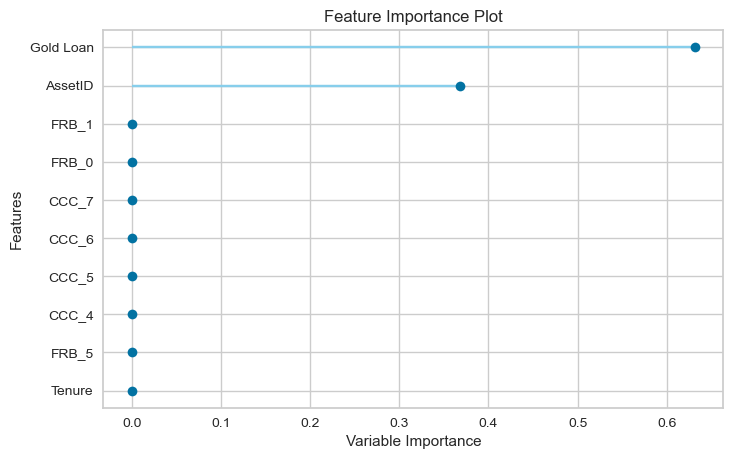

In [248]:
plot_model(estimator=tune_dt, plot='feature')

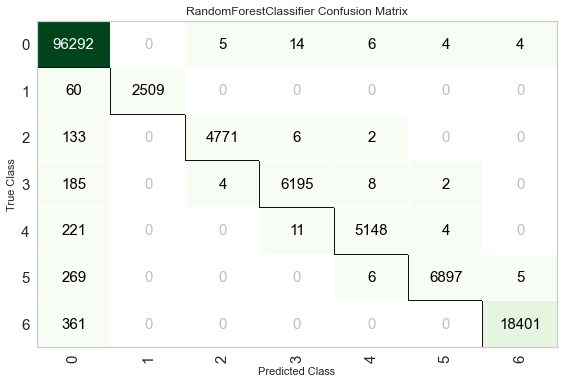

In [137]:
plot_model(rf, plot = 'confusion_matrix')

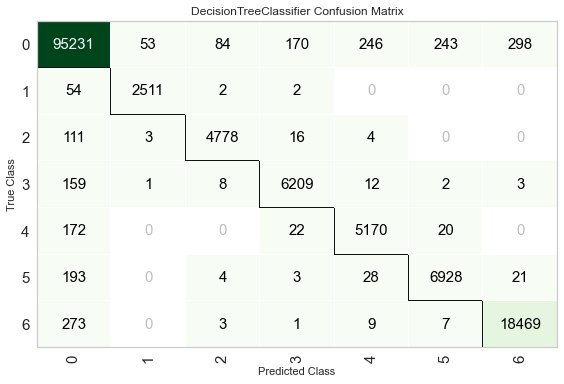

In [250]:
plot_model(dt, plot = 'confusion_matrix')

In [73]:
final_rf = finalize_model(rf)

In [251]:
final_dt = finalize_model(dt)

In [ ]:
model1 = create_model(estimator=)

In [ ]:
en = ensemble_model(dt, method = 'Bagging',  fold = 10, n_estimators = 10, round = 4,  choose_better = False, optimize = 'F1', verbose = True)

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:42:30
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


In [ ]:
final_en= finalize_model(en)

In [ ]:
pred_en = predict_model(estimator= final_en, data=final_df_test,verbose=True)

In [226]:
prediction_rf = predict_model(estimator= final_rf, data=final_df_test,verbose=True)

In [256]:
pred_dt = predict_model(estimator= final_dt, data=final_df_test,verbose=True)

In [228]:
prediction_rf

,ID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,AssetID,SupplierID,LTV,AGE,...,0.0_y,1.0_y,2.0_x,3.0_x,0.0,1.0,2.0_y,3.0_y,Label,Score
0,4,46,480000,365000.0,365000.0,1000.0,3524747,22354,75.83,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.79
1,5,45,480000,285000.0,285000.0,9300.0,4985862,22354,57.44,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.87
2,6,48,580000,400000.0,400000.0,35800.0,12881783,65929,68.97,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.86
3,25,36,725000,500000.0,500000.0,52000.0,10613776,68597,61.79,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.80
4,119,48,617000,400000.0,400000.0,35400.0,7911110,38493,59.09,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,35,530016,419616.0,419616.0,14723.0,4276747,22094,79.17,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.78
14741,143397,36,595000,446500.0,446500.0,15491.0,4746586,61196,75.04,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.83
14742,143398,36,595000,446500.0,446500.0,15491.0,4746588,61196,75.04,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.83
14743,143399,12,400000,280000.0,280000.0,25350.0,11719081,63565,70.00,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.86


In [ ]:
sub = pd.read_csv('sample_submission_ejm25Dc.csv')

In [ ]:
sub.head()

In [ ]:
pred_en.Label.value_counts()

In [ ]:
sub['Top-up Month'] = pred_en.Label

In [ ]:
rev_mapping_dict = {0:'No Top-up Service', 1:'12-18 Months',2:'18-24 Months', 3:'24-30 Months', 
                4:'30-36 Months',5:'36-48 Months',6:' > 48 Months'}

In [ ]:
sub['Top-up Month'] = sub['Top-up Month'].replace(rev_mapping_dict) 

ID      Top-up Month     
143400  No Top-up Service    1
63948   No Top-up Service    1
63946   No Top-up Service    1
63941   No Top-up Service    1
63940   No Top-up Service    1
                            ..
102820   > 48 Months         1
102808  No Top-up Service    1
102777  No Top-up Service    1
102773  No Top-up Service    1
4       No Top-up Service    1
Length: 14745, dtype: int64

In [ ]:
sub.to_csv('en.csv', index =False)